<a href="https://colab.research.google.com/github/lnemzer/Mathematica/blob/master/Paradox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paradoxical Resistance
###Louis R. Nemzer, Ph.D.
###December 2019
$\frac{dx}{dt} = x \frac{r_0}{c_x}(1-\frac{c_x}{t_x}A-\frac{x+y}{K})$
######$x$ is current population
######$r_0$ is wild-type growth rate
######$c_x$ is cost of resistance
######$t_x$ is private benefit of resistance
######$A$ is antibiotic ($A_{Wild-MIC}=1$)
######$K$ is Carrying Capacity



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from google.colab import files

In [0]:
r0,dt=1,0.1
cx,cy,tx,ty=1,1.3,1,2

In [0]:
def xdot(x,y,A):
  return x*(r0/cx)*(1-A*(cx/tx)-(x+y))*dt
def ydot(x,y,A):
  return y*(r0/cy)*(1-A*(cy/ty)-(x+y))*dt

In [0]:
p0,f=0.002,0.01
x,y,A=p0*(1-f),p0*f,0.5
xs=[x]
ys=[y]
while True:
  x=np.clip(x+xdot(x,y,A),0,1)
  y=np.clip(y+ydot(x,y,A),0,1)
  xs.append(x)
  ys.append(y)
  if (x+y)>0.999 or (x+y)<0.001 or (np.absolute(xdot(x,y,A))<0.0001 and np.absolute(ydot(x,y,A))<0.0001):
        break

In [0]:
maxsteps=2000
def LV(p0,f,A,steps):
  x,y=p0*(1-f),p0*f
  xs=[x]
  ys=[y]
  time = 0
  while time<steps:
    x=np.clip(x+xdot(x,y,A),0,1)
    y=np.clip(y+ydot(x,y,A),0,1)
    xs.append(x)
    ys.append(y)
    if (x+y)>0.9999 or (x+y)<0.0001 or (np.absolute(xdot(x,y,A))<0.00001 and np.absolute(ydot(x,y,A))<0.00001):
        break
    time+=1
  return x+y

pi=0.001
def S(f,A):
  dA=0.1
  S=(LV(pi,f,A,maxsteps)-LV(pi,f,A+dA,maxsteps))/dA
  return S        

In [0]:
ylist = np.linspace(0, 2, num=30)
xlist = np.logspace(-2, 0, num=30)
Ss=[]
for A in ylist:
  for f in xlist:  
    Ss.append(S(f,A))
Sarray=np.reshape(Ss,(30,30))

In [0]:
dA=0.1
S=[]
for a in range(100):
  A=a/100
  S.append((-(LV(0.01,0.5,A+dA,20)-LV(0.01,0.5,A,20))/dA))

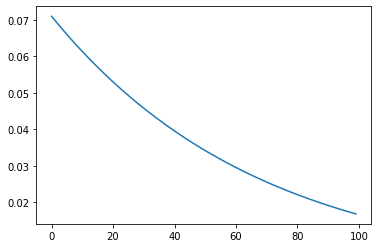

In [341]:
plt.plot(S)

(0, 1)

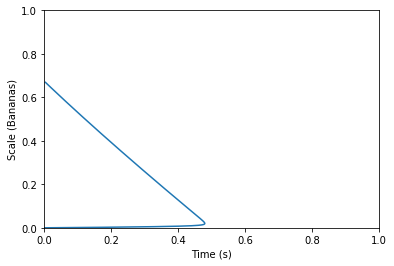

In [342]:
plt.plot(xs,ys)
plt.xlabel("Time (s)")
plt.ylabel("Scale (Bananas)")
plt.xlim(0, 1)
plt.ylim(0, 1)

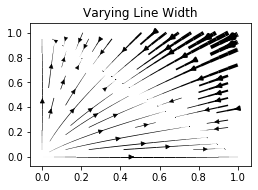

In [343]:
A=0
Y, X = np.mgrid[0:1:100j, 0:1:100j]
U = xdot(X,Y,A)
V = ydot(X,Y,A)
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

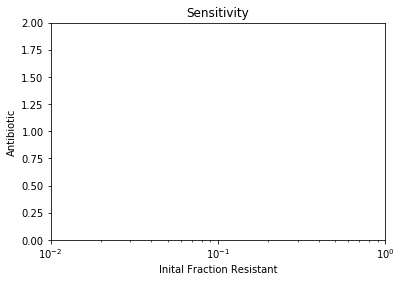

In [344]:
#xlist = np.logspace(-3, -1, num=10)
#ylist = np.linspace(0, 1, num=10)
X, Y = np.meshgrid(xlist, ylist)

Z = Sarray
plt.figure()

fig, ax = plt.subplots()
#CS = ax.contour(X, Y, Z,[-1,0])
CS = ax.contourf(X,Y,Z, levels=[-20, 0, 20],
    colors=['xkcd:purple','xkcd:white','xkcd:purple'], extend='both')
ax.set_title('Sensitivity')

plt.xlabel('Inital Fraction Resistant')
plt.ylabel('Antibiotic')
plt.xscale('log')
plt.savefig("abc.jpg")
files.download("abc.jpg") 
plt.show()